# Show some basics and options for the retrieval
This notebooks reads a sample spectra and illustrates the retrieval from Barret et al. (2019) and some sensitivities for the particle properties

In [1]:
from PSDretrieval import processRadar as pR
import matplotlib.pyplot as plt

In [2]:
SpecWindow = pR.loadSpectra(loadSample=True) #load sample spectra (window of several heights and time steps)
SpecSingle  = pR.selectSingleTimeHeight(SpecWindow)

In [3]:
SpecSingle

<xarray.Dataset>
Dimensions:           (doppler: 250)
Coordinates:
    time              datetime64[ns] 2019-01-22T14:55:00
    range             float32 1.008e+03
  * doppler           (doppler) float64 -2.0 -1.99 -1.98 ... 0.47 0.48 0.49
Data variables:
    WSpecH            (doppler) float64 ...
    KaSpecH           (doppler) float64 ...
    XSpecH            (doppler) float64 ...
    pa                float32 ...
    XSpecHspecNoise   float32 ...
    KaSpecHspecNoise  float32 ...
    DWR_X_Ka          (doppler) float64 ...
    DWR_Ka_W          (doppler) float64 ...

### plot the sample spectrum

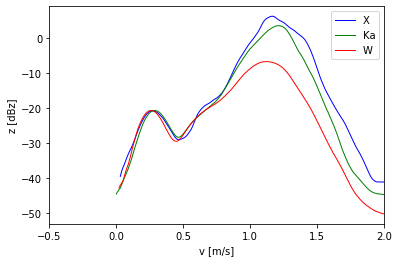

In [4]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax = pR.plotObsSpectra(SpecSingle,ax)

# 1. Calculate spectral DWR_Ka_W

Text(0, 0.5, 'DWR$_{Ka,W}$ [dB]')

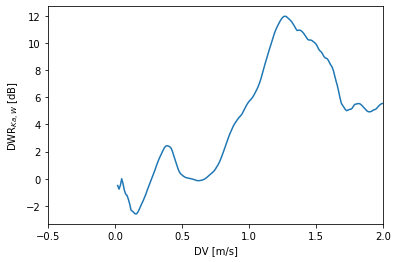

In [7]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(-SpecSingle.DWR_Ka_W.doppler,SpecSingle.DWR_Ka_W)
ax.set_xlim([-0.5,2])
ax.set_xlabel("DV [m/s]")
ax.set_ylabel("DWR$_{Ka,W}$ [dB]")